In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense , Dropout

In [46]:
df = pd.read_csv('C:/Users/maxia/Downloads/resourcesxxx.csv')

# Extract features and target
X = df.drop(columns=['DataCenterID'])
y = df['DataCenterID']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

noise_factor = 0.05  # You can adjust this parameter based on your needs
X_noisy = X_scaled + noise_factor * np.random.normal(size=X_scaled.shape)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [48]:
X_train.shape[1]

14

In [52]:
# Reshape data for LSTM input (assuming a time series sequence length of 1)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_lstm = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])

# Define the LSTM model
model = Sequential()
from keras.regularizers import l2

model.add(LSTM(units=50, input_shape=(1, X_train.shape[1]), return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=len(df['DataCenterID'].unique()), activation='softmax'))
model.add(Dropout(0.5))
num_classes = len(df['DataCenterID'].unique())
model.add(Dense(units=num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_val_lstm, y_val), callbacks=[early_stopping])


Epoch 1/20
23/23 [==============================] - 5s 43ms/step - loss: 1.1739 - accuracy: 0.3500 - val_loss: 1.1077 - val_accuracy: 0.3111
Epoch 2/20
23/23 [==============================] - 0s 7ms/step - loss: 1.0962 - accuracy: 0.3694 - val_loss: 1.0032 - val_accuracy: 0.3111
Epoch 3/20
23/23 [==============================] - 0s 6ms/step - loss: 0.9611 - accuracy: 0.4583 - val_loss: 0.8782 - val_accuracy: 0.6833
Epoch 4/20
23/23 [==============================] - 0s 7ms/step - loss: 0.8843 - accuracy: 0.5833 - val_loss: 0.8388 - val_accuracy: 0.7556
Epoch 5/20
23/23 [==============================] - 0s 6ms/step - loss: 0.8579 - accuracy: 0.6028 - val_loss: 0.8054 - val_accuracy: 0.8000
Epoch 6/20
23/23 [==============================] - 0s 6ms/step - loss: 0.8343 - accuracy: 0.6111 - val_loss: 0.7706 - val_accuracy: 0.9611
Epoch 7/20
23/23 [==============================] - 0s 6ms/step - loss: 0.8130 - accuracy: 0.6486 - val_loss: 0.7344 - val_accuracy: 1.0000
Epoch 8/20
23/23 [=

Epoch 1/100
23/23 [==============================] - 0s 8ms/step - loss: 0.6458 - accuracy: 0.6694 - val_loss: 0.4327 - val_accuracy: 1.0000
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6103 - accuracy: 0.6847 - val_loss: 0.4227 - val_accuracy: 1.0000
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6306 - accuracy: 0.6722 - val_loss: 0.4132 - val_accuracy: 1.0000
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5868 - accuracy: 0.6917 - val_loss: 0.4039 - val_accuracy: 1.0000
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5702 - accuracy: 0.7014 - val_loss: 0.3950 - val_accuracy: 1.0000
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6271 - accuracy: 0.6486 - val_loss: 0.3870 - val_accuracy: 1.0000
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6120 - accuracy: 0.6694 - val_loss: 0.3798 - val_accuracy: 1.0000
Epoch 8/100
2

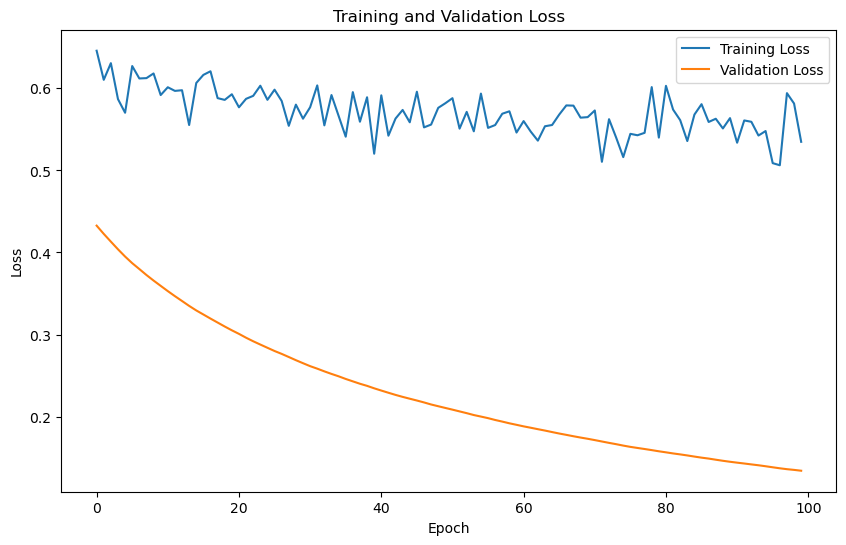

In [53]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model with X_train_lstm, y_train
history = model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_val_lstm, y_val), callbacks=[early_stopping])

# Plot training and validation loss
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.show()